<h1>Nike fabrics used</h1>

<h2>Objective</h2>    

Analyze the types and volumes of materials used by Nike, focusing on use of plastics.

<h2>Data</h2>

The data comes from a table published by NIKE Apparel: "Top Five Materials in Product by Volume" in it Impact Report 2022. The table reflects material used by the company per year, including data from 2020-2022. The production in that period influenced by Covid-19 pandemic. Seeing other companies' production trend, we can observed a dip in 2020-2021 for all apparel brands. <br>

Total material use rows reflect both EPM (Enterprise Performance Management) totals and conventional materials totals. <br>
<br>
Cotton and polyester data includes NIKE Brand footwear, apparel and socks, and Converse footwear and apparel. <br>
Rubber, EVA foam and leather data includes NIKE Brand footwear only.<br>
<br>

https://about.nike.com/en/impact-resources/fy22-nike-inc-impact-report

<br>
values in metric tons
percentage given refers to material type only

"Polyester, found in nearly every pair of
NIKE footwear, is a core material due to its
performance and durability. Because polyester
is such a versatile and widely used material in
NIKE footwear, it is also the primary option to
focus on transitioning to recycled polyester
at scale, as it can be replaced with little to
no compromise to material performance,
aesthetic and hand feel." 

<h2>Steps</h2>
- Load and Inspect Data
- Ensure the data is clean (e.g., no missing values, consistent formatting) </br>
- Identify key columns like material type, volume (in tonnes), and year.</br>
- Aggregate Data by Material Type:</br>
- Calculate the total volume for each type of fabric across all years.</br>
- Rank materials by their volume contribution.</br>
- Analyze Sustainability Trends:</br>
- Focus on recycled materials (e.g., recycled polyester, recycled rubber) and their share of total material use.</br>
- Compute and visualize the percentage of recycled vs. non-recycled materials per year.</br>
- Visualize Trends:</br>
- Create line charts for the volumes of each material over time.</br>
- Use stacked bar charts to show the proportion of recycled materials in total use per year.</br>
- Highlight Insights:</br>
- Discuss whether Nike is moving towards more sustainable practices based on the data.</br>
- Identify materials that dominate the product line and their environmental implications. 

In [3]:
#pip install numpy==1.23.5

In [4]:
#!pip install plotly==5.24.1

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [1]:
import plotly.express as px

In [7]:
!pip show numpy


Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

<h3> Creating the data from a pdf using chat gpt to transform it </h3>

In [170]:
# Data dictionary
data = {
    "Material": [
        "Polyester Recycled", "Total Polyester Use",
        "Cotton Organic", "Cotton Recycled", "Cotton Third-Party Certified", "Total Cotton Use",
        "Rubber Recycled", "Total Rubber Use",
        "EVA Foam Recycled", "Total EVA Foam Use",
        "Leather Flyleather", "Leather Synthetic Leather", "Total Leather Use"
    ],
    "2020": [44387, 195490, 10811, 503, 85139, 113615, 564, 76141, 978, 61053, 53, 18623, 51646],
    "%  of total for the material 2020": [23, 100, 10, 0.4, 75, 100, 0.7, 100, 2, 100, 0.1, 36, 100],
    "2021": [55477, 166343, 13680, 905, 66776, 115543, 689, 78896, 907, 53055, 57, 16031, 60502],
    "% of total for the material 2021": [33, 100, 12, 0.8, 58, 100, 0.9, 100, 2, 100, 0.1, 26, 100],
    "2022": [82317, 180645, 17748, 867, 94417, 142113, 2045, 94494, 2648, 44523, 13, 18117, 65870],
    "% of total for the material 2022": [46, 100, 12, 0.6, 66, 100, 2, 100, 0.1, 100, 0.02, 28, 100],
}

# Convert to DataFrame
nike_data = pd.DataFrame(data)

nike_data


NameError: name 'NaN' is not defined

In [9]:
nike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Material                           13 non-null     object 
 1   2020                               13 non-null     int64  
 2   %  of total for the material 2020  13 non-null     float64
 3   2021                               13 non-null     int64  
 4   % of total for the material 2021   13 non-null     float64
 5   2022                               13 non-null     int64  
 6   % of total for the material 2022   13 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 860.0+ bytes


In [10]:
nike_data.describe()

,2020,% of total for the material 2020,2021,% of total for the material 2021,2022,% of total for the material 2022
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,50692.538462,49.784615,48373.923077,48.676923,57370.538462,50.363077
std,57441.624531,45.947485,51057.643415,45.162395,58904.505864,45.120816
min,53.000000,0.100000,57.000000,0.100000,13.000000,0.020000
25%,978.000000,2.000000,907.000000,2.000000,2648.000000,2.000000
50%,44387.000000,36.000000,53055.000000,33.000000,44523.000000,46.000000
75%,76141.000000,100.000000,66776.000000,100.000000,94417.000000,100.000000
max,195490.000000,100.000000,166343.000000,100.000000,180645.000000,100.000000


From here we see that polyester is the main fabric used by Nike

In [12]:
#Let's see totals: for this, we need to make a df with rows containing 'total' only
nike_totals = nike_data[nike_data['Material'].str.contains('total', case=False, na=False)]
nike_totals

,Material,2020,% of total for the material 2020,2021,% of total for the material 2021,2022,% of total for the material 2022
1,Total Polyester Use,195490,100.0,166343,100.0,180645,100.0
5,Total Cotton Use,113615,100.0,115543,100.0,142113,100.0
7,Total Rubber Use,76141,100.0,78896,100.0,94494,100.0
9,Total EVA Foam Use,61053,100.0,53055,100.0,44523,100.0
12,Total Leather Use,51646,100.0,60502,100.0,65870,100.0


In [13]:
#nike_totals.drop(['FY20 %', 'FY21 %', 'FY22 %'], axis=1, inplace=True)

In [150]:
column_sums = nike_totals[["2020", "2021", "2022"]].sum() 
column_sums

2020    497945
2021    474339
2022    527645
dtype: int64

In [15]:
#nike_totals.reset_index(inplace=True)
#nike_totals

In [16]:
#nike_totals = pd.concat([nike_totals, total_volumes], ignore_index=True)
#nike_totals

In [17]:
nike_totals.set_index(nike_totals['Material'], inplace=True)
nike_totals

,Material,2020,% of total for the material 2020,2021,% of total for the material 2021,2022,% of total for the material 2022
Material,,,,,,,
Total Polyester Use,Total Polyester Use,195490,100.0,166343,100.0,180645,100.0
Total Cotton Use,Total Cotton Use,113615,100.0,115543,100.0,142113,100.0
Total Rubber Use,Total Rubber Use,76141,100.0,78896,100.0,94494,100.0
Total EVA Foam Use,Total EVA Foam Use,61053,100.0,53055,100.0,44523,100.0
Total Leather Use,Total Leather Use,51646,100.0,60502,100.0,65870,100.0


<h5>What is the percentage of polyester in the total?</h5>

In [173]:
print ((nike_totals["2020"] / column_sums["2020"]) * 100)

Material
Total Polyester Use    39.259356
Total Cotton Use       22.816777
Total Rubber Use       15.291046
Total EVA Foam Use     12.260993
Total Leather Use      10.371828
Name: 2020, dtype: float64


In [178]:
print ((nike_totals["2022"] / column_sums["2022"]) * 100)

Material
Total Polyester Use    34.236087
Total Cotton Use       26.933450
Total Rubber Use       17.908632
Total EVA Foam Use      8.438060
Total Leather Use      12.483772
Name: 2022, dtype: float64


Conclusion: use of polyester by NIKE Apparel dropped by 5% between 2020 and 2022 but still represents over 1/3 of the company's production. At the same time, we see an increase in rubber production.

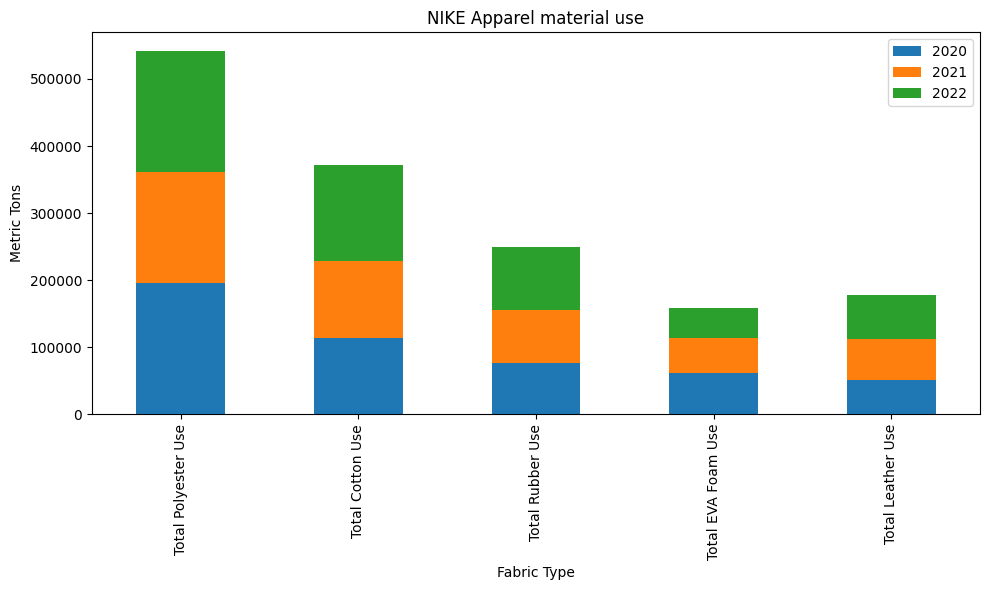

In [18]:
#stack bar for each fabric
import matplotlib.pyplot as plt

# Plot stacked bar chart for all fabric types
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting a stacked bar plot for each year (FY20, FY21, FY22)
nike_totals[['2020', '2021', '2022']].plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
ax.set_xlabel('Fabric Type')
ax.set_ylabel('Metric Tons')
ax.set_title('NIKE Apparel material use')

# Show the plot
plt.tight_layout()
plt.savefig("Material_use1.svg")
plt.show()


In [19]:
nike_totals_pivot=nike_totals[['2020','2021','2022']].copy()
nike_totals_pivot

,2020,2021,2022
Material,,,
Total Polyester Use,195490,166343,180645
Total Cotton Use,113615,115543,142113
Total Rubber Use,76141,78896,94494
Total EVA Foam Use,61053,53055,44523
Total Leather Use,51646,60502,65870


In [20]:
nike_totals_pivot=nike_totals_pivot.T

In [21]:
nike_totals_pivot

Material,Total Polyester Use,Total Cotton Use,Total Rubber Use,Total EVA Foam Use,Total Leather Use
2020,195490,113615,76141,61053,51646
2021,166343,115543,78896,53055,60502
2022,180645,142113,94494,44523,65870


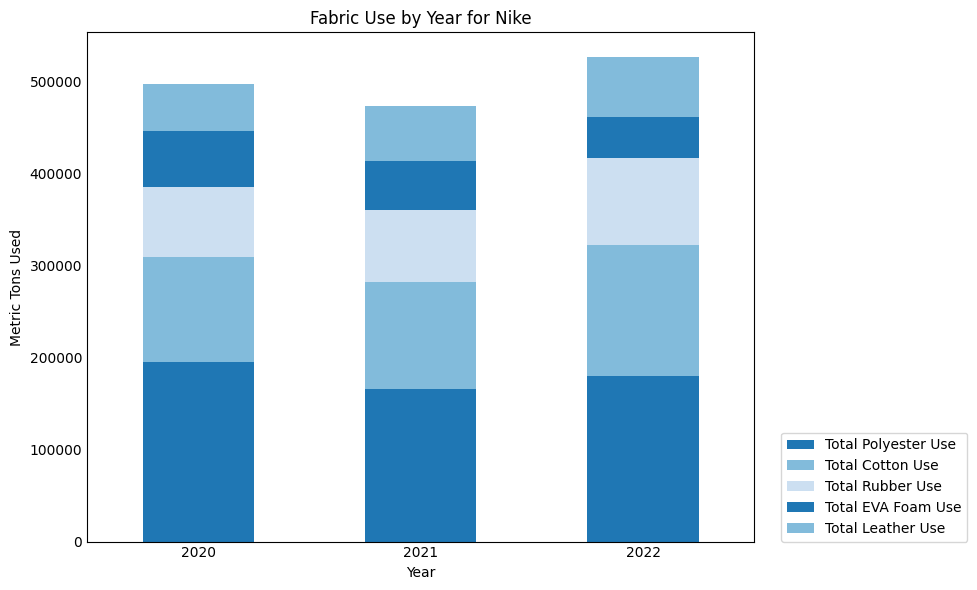

In [183]:
# Plot stacked bar chart for all fabric types
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting a stacked bar plot for each year (FY20, FY21, FY22)
nike_totals_pivot[['Total Polyester Use', 'Total Cotton Use','Total Rubber Use','Total EVA Foam Use','Total Leather Use']].plot(kind='bar', stacked=True, ax=ax, linewidth=0)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Metric Tons Used')
ax.set_title('Fabric Use by Year for Nike')

fig.autofmt_xdate(rotation=0, ha='center')

plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.savefig("Material_use_per_year.svg")
plt.show()

#change the legend outside, change colurs, labels, names inside (?)


In [26]:
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope
import plotly.graph_objects as go
x = [1,2,3,4]
y = [7,5,6,2]
b = px.line(x=x, y=y)
b.show()


TypeError: argument of type 'NoneType' is not iterable

In [ ]:
One last thing is to have a number: percentage of 

<h3>Sites</h3>

In [28]:
path2 = 'Data sets/nike_factories.csv'
data2 = pd.read_csv(path2, index_col=None)
data2.head()

,Factory Name,Factory Type,Product Type Type,"Nike, Inc. Brand(s)",Events,Supplier Group,Address,City,State,Postal Code,Country / Region,Region,Total Workers,Line Workers,% Female Workers
0,ArtFX Concord,FINISHED GOODS,Apparel,Nike,NaN,TEGRA,244 Manor Ave SW,Concord,North Carolina,28025.0,USA,AMERICAS,116,104,49
1,TKG TAEKWANG VINA JOINT STOCK COMPANY-MY THO B...,FINISHED GOODS - COMPONENTS,Footwear,Nike,NaN,TAEKWANG,864 Street C group,My Tho,Tin Giang,860000.0,Vietnam,SE ASIA,6429,5854,94
2,Pou Chen Corporation,FINISHED GOODS,Footwear,Nike,NaN,POU CHEN,No 2 Fugong Rd,Changhua,Changhua,506027.0,Taiwan,N ASIA,1700,489,64
3,"Vietnam Golden Victory Co., Ltd.",FINISHED GOODS,Footwear,Nike,Collegiate,STELLA,DONG KY VILLAGE NGHIA MINH WARD NGHIA HUNG DIS...,Nam Dinh,Nam Ðnh,420000.0,Vietnam,SE ASIA,8850,8075,80
4,Zhejiang Guangtai Delta Socks Co. Ltd.,FINISHED GOODS,Equipment,Nike,Collegiate,DELTA,36 Kaixiang Avenue,Datang Street Zhuji,Zhejiang,311812.0,China,N ASIA,215,164,65


In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Factory Name         644 non-null    object 
 1   Factory Type         644 non-null    object 
 2   Product Type Type    644 non-null    object 
 3   Nike, Inc. Brand(s)  644 non-null    object 
 4   Events               151 non-null    object 
 5   Supplier Group       644 non-null    object 
 6   Address              644 non-null    object 
 7   City                 643 non-null    object 
 8   State                644 non-null    object 
 9   Postal Code          614 non-null    float64
 10  Country / Region     644 non-null    object 
 11  Region               644 non-null    object 
 12  Total Workers        644 non-null    int64  
 13  Line Workers         644 non-null    int64  
 14  % Female Workers     644 non-null    int64  
dtypes: float64(1), int64(3), object(11)
memo

In [36]:
selected_columns = ['Product Type Type', 'Nike, Inc. Brand(s)','Country / Region', 'Total Workers']
# Create a new DataFrame with only the selected columns
nike_sites = data2[selected_columns].copy()

#nike_sites = data2.drop(['Factory Name', 'Factory Type', 'FY22 %'], axis=1

In [38]:
nike_sites

,Product Type Type,"Nike, Inc. Brand(s)",Country / Region,Total Workers
0,Apparel,Nike,USA,116
1,Footwear,Nike,Vietnam,6429
2,Footwear,Nike,Taiwan,1700
3,Footwear,Nike,Vietnam,8850
4,Equipment,Nike,China,215
...,...,...,...,...
639,Apparel,Nike,Taiwan,120
640,Apparel,Nike,Vietnam,2053
641,Footwear,Converse,Italy,157
642,Apparel,Nike,Cambodia,503


Now, we want to see where the workers are located by country. So we need to make .sum() Total Workers by region.

In [44]:
nike_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Type Type    644 non-null    object
 1   Nike, Inc. Brand(s)  644 non-null    object
 2   Country / Region     644 non-null    object
 3   Total Workers        644 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 20.3+ KB


In [48]:
nike_sites.describe()

,Total Workers
count,644.000000
mean,1953.402174
std,3646.724522
min,3.000000
25%,185.500000
50%,685.000000
75%,1881.250000
max,29272.000000


In [54]:
countries = nike_sites['Country / Region'].unique() 
countries

array(['USA', 'Vietnam', 'Taiwan', 'China', 'Thailand', 'South Korea',
       'Pakistan', 'Bosnia', 'Brazil', 'Indonesia', 'Italy', 'Jordan',
       'Egypt', 'India', 'Japan', 'Sri Lanka', 'Argentina', 'Mexico',
       'Guatemala', 'Philippines', 'Georgia', 'Cambodia', 'Honduras',
       'El Salvador', 'Turkey', 'Moldova', 'Laos', 'Malaysia',
       'South Africa', 'Spain', 'Nicaragua', 'France', 'Canada',
       'United Kingdom', 'Netherlands', 'Lithuania', 'Israel'],
      dtype=object)

In [114]:
workforce_countries = nike_sites.groupby('Country / Region')['Total Workers'].sum().reset_index()

workforce_countries.sort_values(by=['Total Workers'], ascending=False, inplace=True)


In [106]:
#workforce_countries.set_index(workforce_countries['Country / Region'], inplace=True)

In [136]:
workforce_countries = workforce_countries.reset_index(drop=True)

In [138]:
workforce_countries

,Country / Region,Total Workers
0,Vietnam,491397
1,Indonesia,284519
2,China,139397
3,Cambodia,56655
4,Pakistan,50768
5,India,44634
6,Sri Lanka,39477
7,Thailand,26469
8,Brazil,20449
9,Egypt,14091


In [132]:
top_countries = workforce_countries[workforce_countries['Total Workers'] > 10000]

In [134]:
top_countries

,Country / Region,Total Workers
0,Vietnam,491397
1,Indonesia,284519
2,China,139397
3,Cambodia,56655
4,Pakistan,50768
5,India,44634
6,Sri Lanka,39477
7,Thailand,26469
8,Brazil,20449
9,Egypt,14091


In [142]:
top_countries.set_index(top_countries['Country / Region'], inplace=True)

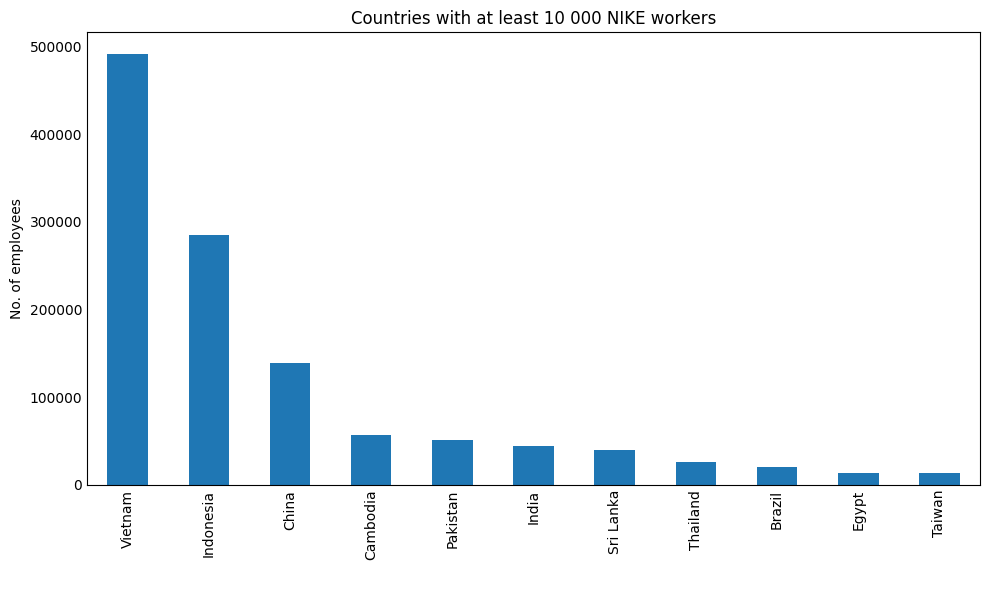

In [181]:

# Plot stacked bar chart for all fabric types
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting a stacked bar plot for each year (FY20, FY21, FY22)
top_countries['Total Workers'].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel(' ')
ax.set_ylabel('No. of employees')
ax.set_title('Countries with at least 10 000 NIKE workers')

# Show the plot
plt.tight_layout()
plt.savefig("Nike_workforce_countries.svg")
plt.show()